In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('data/amazon.csv') # Replace with actual dataset path

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [5]:
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [6]:
# Text preprocessing
class TextPreprocessor(TransformerMixin):
    def transform(self, X, **transform_params):
        return [self._clean_text(text) for text in X]
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def _clean_text(self, text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# List of stop words
#stop_words = set(['the', 'and', 'is', 'in', 'to', 'of', 'for', 'it', 'on', 'with', 'as', 'this', 'that', 'are'])


In [8]:
# Applying text preprocessing
preprocessor = TextPreprocessor()
df['cleaned_reviewText'] = preprocessor.transform(df['reviewText'])


In [9]:
df.head()

,reviewText,Positive,cleaned_reviewText
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...
1,This is a pretty good version of the game for ...,1,pretty good version game free lots different l...
2,this is a really cool game. there are a bunch ...,1,really cool game bunch levels find golden eggs...
3,"This is a silly game and can be frustrating, b...",1,silly game frustrating lots fun definitely rec...
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad hrs fun grandkids love great...


In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviewText'], df['Positive'], test_size=0.2, random_state=42)


In [11]:
# 3. Model Selection
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [12]:
# Vectorization and training pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [13]:
# 4. Model Training and 5. Formal Evaluation
results = {}

for name, model in models.items():
    pipeline.set_params(clf=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}\n")

Logistic Regression Results:
Accuracy: 0.89
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
Confusion Matrix:
[[ 619  339]
 [ 102 2940]]

Random Forest Results:
Accuracy: 0.87
Precision: 0.87
Recall: 0.97
F1 Score: 0.92
Confusion Matrix:
[[ 532  426]
 [  89 2953]]

SVM Results:
Accuracy: 0.89
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
Confusion Matrix:
[[ 636  322]
 [ 102 2940]]

Naïve Bayes Results:
Accuracy: 0.80
Precision: 0.79
Recall: 1.00
F1 Score: 0.88
Confusion Matrix:
[[ 146  812]
 [   8 3034]]

Gradient Boosting Results:
Accuracy: 0.84
Precision: 0.84
Recall: 0.98
F1 Score: 0.90
Confusion Matrix:
[[ 385  573]
 [  61 2981]]



In [14]:
# Logistic Regression
lr_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'saga']
}

pipeline.set_params(clf=LogisticRegression(max_iter=1000))

grid_search_lr = GridSearchCV(pipeline, lr_param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validated score: {best_score_lr:.2f}")


Best parameters for Logistic Regression: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best cross-validated score: 0.90


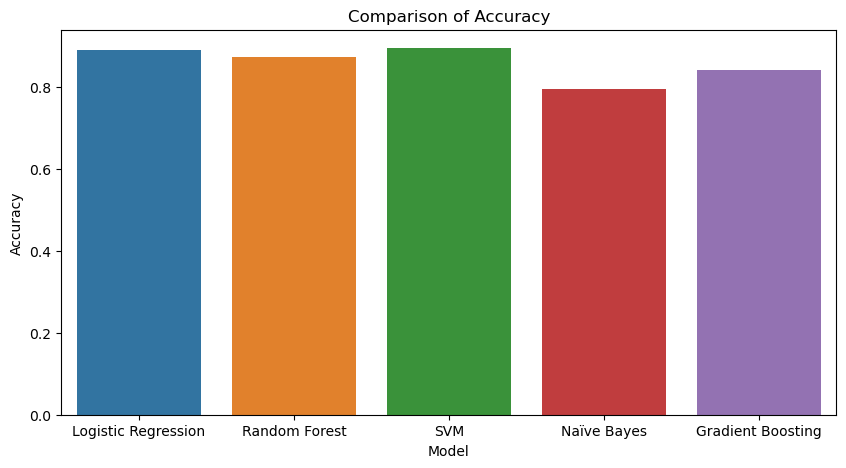

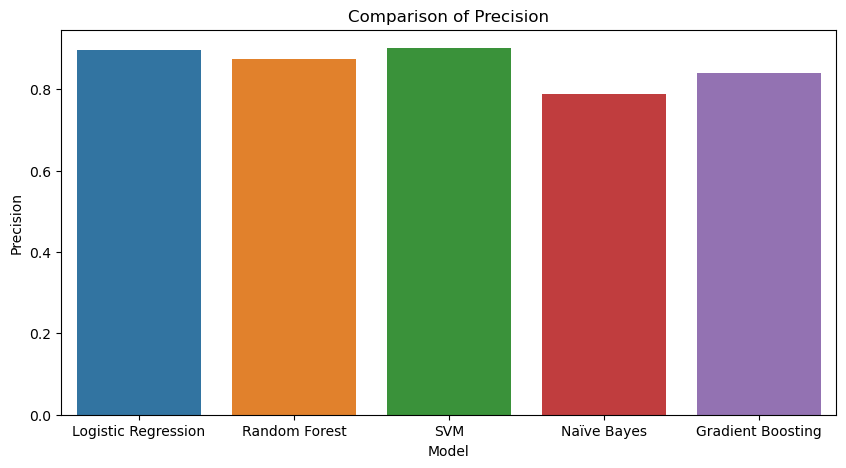

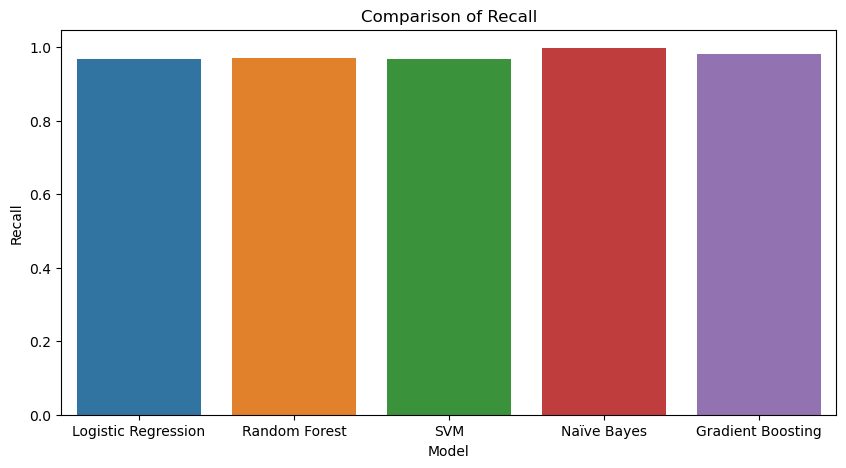

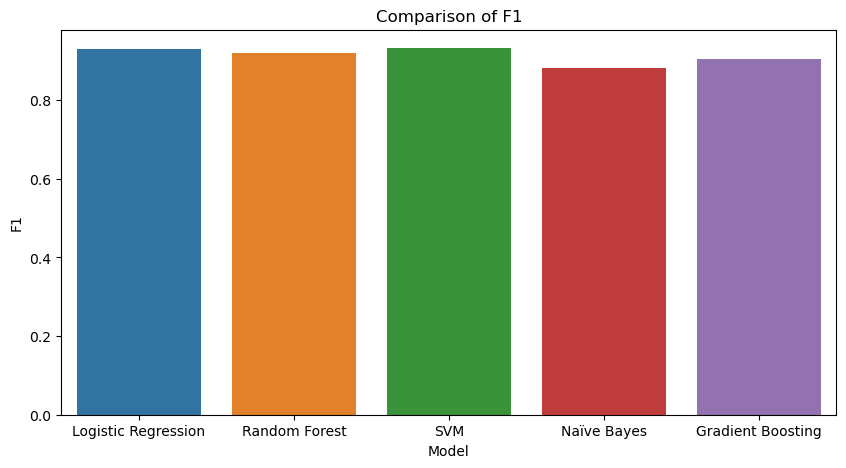

In [15]:
# 7. Comparative Analysis
# Plotting metrics for comparison
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    scores = [results[model][metric] for model in models]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(models.keys()), y=scores)
    plt.title(f'Comparison of {metric.capitalize()}')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Model')
    plt.show()